In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn

In [2]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

In [3]:
p

x,0,0.0101,0.0202,0.0303,0.0404,0.0505,...,0.949,0.96,0.97,0.98,0.99,1
y,0.886,0.476,0.328,0.64,0.303,0.763,...,0.443,0.973,0.0857,0.558,0.159,0.364
a,0,4.85e-05,0.000134,0.000587,0.000494,0.00195,...,0.399,0.896,0.0806,0.535,0.156,0.364


In [4]:
p['a']

0,4.85e-05,0.000134,0.000587,0.000494,0.00195,...,0.399,0.896,0.0806,0.535,0.156,0.364


In [5]:
np.array(p['a'])

array([0.00000000e+00, 4.85180223e-05, 1.33872560e-04, 5.87415728e-04,
       4.93957591e-04, 1.94679394e-03, 1.44167347e-03, 4.76170358e-03,
       3.13889707e-03, 3.17321299e-03, 2.08080573e-04, 6.55309192e-03,
       1.02054420e-04, 1.70578888e-02, 1.44109197e-02, 2.25994322e-02,
       2.12483024e-02, 4.92467818e-03, 2.54745045e-02, 3.51531751e-04,
       1.54768623e-02, 2.71723627e-02, 1.29638081e-02, 3.05330816e-02,
       5.49072058e-02, 3.51475816e-02, 3.59394564e-02, 8.44722857e-03,
       6.63035948e-02, 2.36222594e-02, 6.31139138e-02, 7.09744920e-02,
       2.51647674e-02, 5.19260603e-02, 1.12723060e-01, 6.07986439e-02,
       3.97379679e-02, 8.14413633e-02, 6.30666508e-03, 7.71116346e-03,
       9.47315464e-03, 4.50632307e-02, 1.77152626e-01, 4.59305085e-02,
       2.00085183e-02, 3.51255951e-02, 2.14450214e-01, 1.77379805e-01,
       1.00758426e-01, 7.20214387e-02, 8.83453397e-03, 2.60171010e-01,
       1.42586724e-01, 1.89741355e-01, 3.04581777e-02, 3.35988829e-02,
      

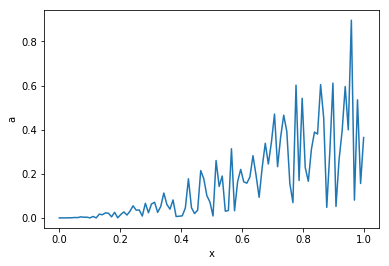

In [6]:
# let's make a simple plot
p.plot('x', 'a')

In [7]:
# different pointdata
p2 = pn.PointData(x=np.random.rand(100))

In [8]:
p2

x,0.123,0.0708,0.566,0.733,0.205,0.319,...,0.99,0.708,0.812,0.585,0.254,0.486


In [9]:
p2 = p.interp(p2)

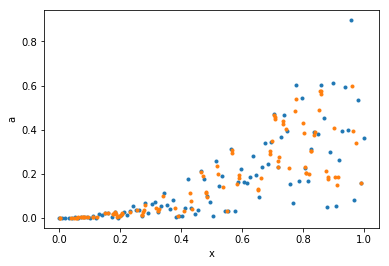

In [10]:
p.plot('x', 'a', '.')
p.interp(p2[['x']], method='linear').plot('x', 'a', '.')

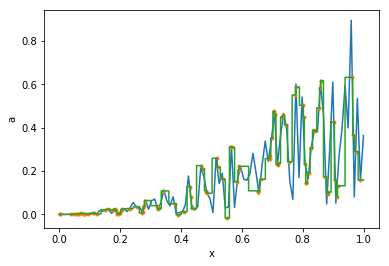

In [11]:
p.plot('x', 'a')
p2.plot('x', 'a', '.')
p2.interp(x=np.linspace(0,1,1000), method='nearest').plot('a')

In [12]:
p.interp(p2)

x,0.123,0.0708,0.566,0.733,0.205,0.319,...,0.99,0.708,0.812,0.585,0.254,0.486
y,0.12,0.954,0.967,0.836,0.534,0.399,...,0.163,0.927,0.217,0.437,0.534,0.411
a,0.0023,0.00477,0.309,0.449,0.0224,0.0405,...,0.159,0.464,0.145,0.15,0.035,0.0977


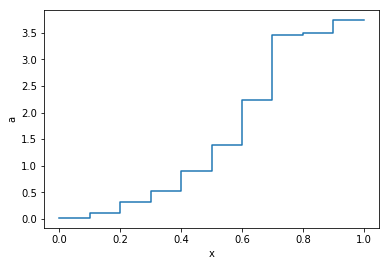

In [13]:
# Generate a histogram function for histograms with weight 'a'
g = p.histogram('x')
g.plot('a')
#g.plot('counts')

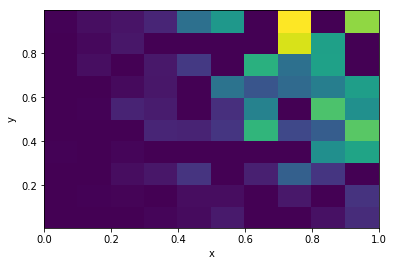

In [14]:
gn = p.histogram('x', 'y')
gn.plot('a')

In [15]:
gn['a']

y \ x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
[0.007 0.106],0,0.000662,0,0.014,0.0295,0.0716,0,0,0.0478,0.132
[0.106 0.204],0,0.00492,0.00845,0,0.0351,0.0336,0,0.0692,0,0.156
[0.204 0.303],0.000494,0,0.0366,0.0649,0.163,0,0.0936,0.324,0.166,0
[0.303 0.402],0.00475,0,0.0155,0,0,0,0,0,0.529,0.628
[0.402 0.501],0.00319,0,0,0.113,0.101,0.164,0.7,0.232,0.311,0.794
[0.501 0.6 ],0,0.00655,0.102,0.0814,0,0.143,0.474,0,0.769,0.535
[0.6 0.698],0.000587,0,0.0272,0.0631,0,0.41,0.282,0.366,0.453,0.596
[0.698 0.797],0.00195,0.0399,0,0.071,0.177,0,0.681,0.392,0.611,0
[0.797 0.896],0,0.0212,0.0663,0,0,0,0,1.01,0.604,0
[0.896 0.995],0.00476,0.0397,0.0549,0.113,0.392,0.574,0,1.07,0,0.896


In [16]:
np.sum(gn['a'], axis='y')

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
,0.0157,0.113,0.311,0.52,0.897,1.4,2.23,3.46,3.49,3.74


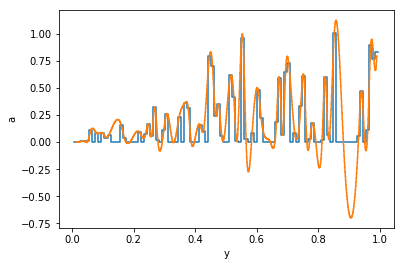

In [17]:
p.histogram(y=100).plot('a')
p.binwise(y=100, function=np.sum, fill_value=np.nan).interp(y=1000, method='cubic').plot('a')

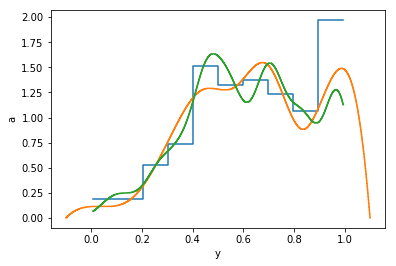

In [32]:
p.histogram('y', density=True).plot('a')
p.histogram(y=np.linspace(-1,1.1,10), density=True).interp(y=1000).plot('a')
p.kde(y=1000, density=True, bw=0.05).plot('a')

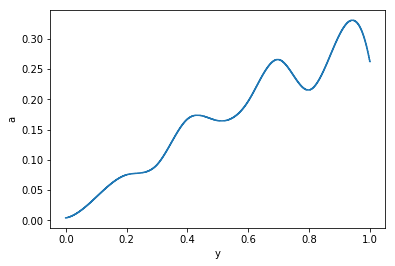

In [19]:
p.binwise(y=np.linspace(-0.1,1.1,13), function=np.mean).interp(y=1000, method='cubic').plot('a')

In [20]:
g = p.histogram(x=10)

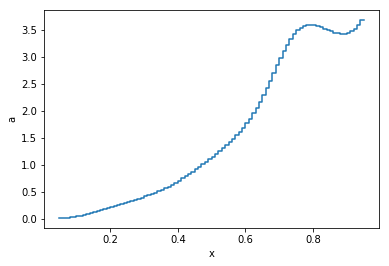

In [21]:
g.interp(x=100).plot('a')

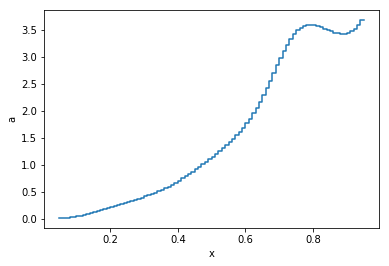

In [22]:
g.interp(x=100).plot('a')

In [23]:
p.histogram(x=10).grid

Grid(
Axis("x",
points = None,
edges = edges: array([[0. , 0.1],
       [0.1, 0.2],
       [0.2, 0.3],
       [0.3, 0.4],
       [0.4, 0.5],
       [0.5, 0.6],
       [0.6, 0.7],
       [0.7, 0.8],
       [0.8, 0.9],
       [0.9, 1. ]]))
nbins = 10),)

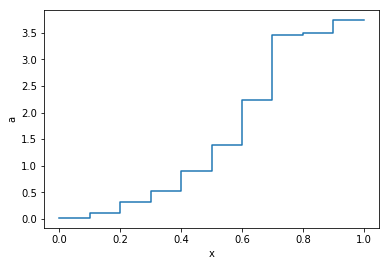

In [24]:
# or in one line
p.histogram('x').plot('a')

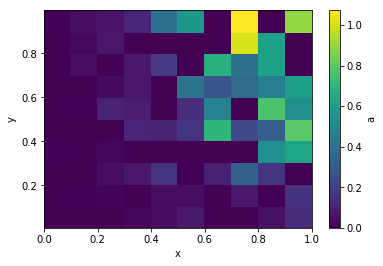

In [25]:
# we can also evaluate the histogram in different dimensions
p.histogram('x', 'y').plot('a', cbar=True)

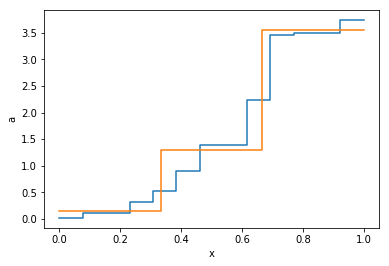

In [26]:


# we can also evaluate the histogram in different dimensions
g = p.histogram('x')
p.histogram('x').resample(x=13).plot('a')
p.histogram('x').resample(x=3).plot('a')


In [27]:
g['a']

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
,0.0157,0.113,0.311,0.52,0.897,1.4,2.23,3.46,3.49,3.74


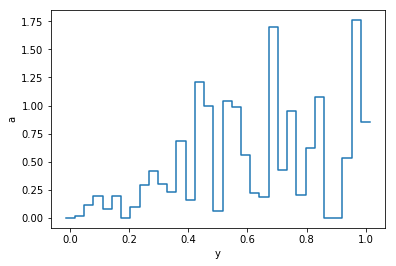

In [28]:
p.histogram(y=np.linspace(0,1,33)).plot('a')

In [29]:
# the returned object is a GridData type
g = p.histogram(x=20)

In [30]:
# it has a grid defined
g.binwise(

SyntaxError: unexpected EOF while parsing (<ipython-input-30-660b17947751>, line 2)

In [ ]:
1//2

In [ ]:
pn.translations.Interpolation.__init__.__doc__

In [ ]:
class A:
    def __init__(self):
        pass
    
    def foo(self):
        pass
    
    foo.__doc__ = 'gg'

In [ ]:
A.foo(